### Classification of Mushroom Edibility by Decision Trees
We are using the OpenML mushroom 24 dataset which has
- 22 categorical attributes
- 2 classes - Poisonous and Edible
See data/dataset_24_mushroom.arff for more details

1. Load in .arff data

In [2]:
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('data/dataset_24_mushroom.arff')
df = pd.DataFrame(data)

# Sample Mushroom
print(df.loc[0])

cap-shape                   b'x'
cap-surface                 b's'
cap-color                   b'n'
bruises%3F                  b't'
odor                        b'p'
gill-attachment             b'f'
gill-spacing                b'c'
gill-size                   b'n'
gill-color                  b'k'
stalk-shape                 b'e'
stalk-root                  b'e'
stalk-surface-above-ring    b's'
stalk-surface-below-ring    b's'
stalk-color-above-ring      b'w'
stalk-color-below-ring      b'w'
veil-type                   b'p'
veil-color                  b'w'
ring-number                 b'o'
ring-type                   b'p'
spore-print-color           b'k'
population                  b's'
habitat                     b'u'
class                       b'p'
Name: 0, dtype: object


2. Keep subset of attributes and one hot encode categorical information, removing redundant class column created
3. Split data into training and testing sets

In [16]:
x = pd.get_dummies(df[['cap-surface', 'gill-attachment', 'stalk-shape',
                          'veil-color', 'ring-type', 'habitat']], dtype=float)

y = pd.get_dummies(df[['class']], dtype=bool)
y.drop(columns=["class_b'p'"], inplace=True)

from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

4. Train model

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

5. Evaluate and display

Accuracy: 0.98


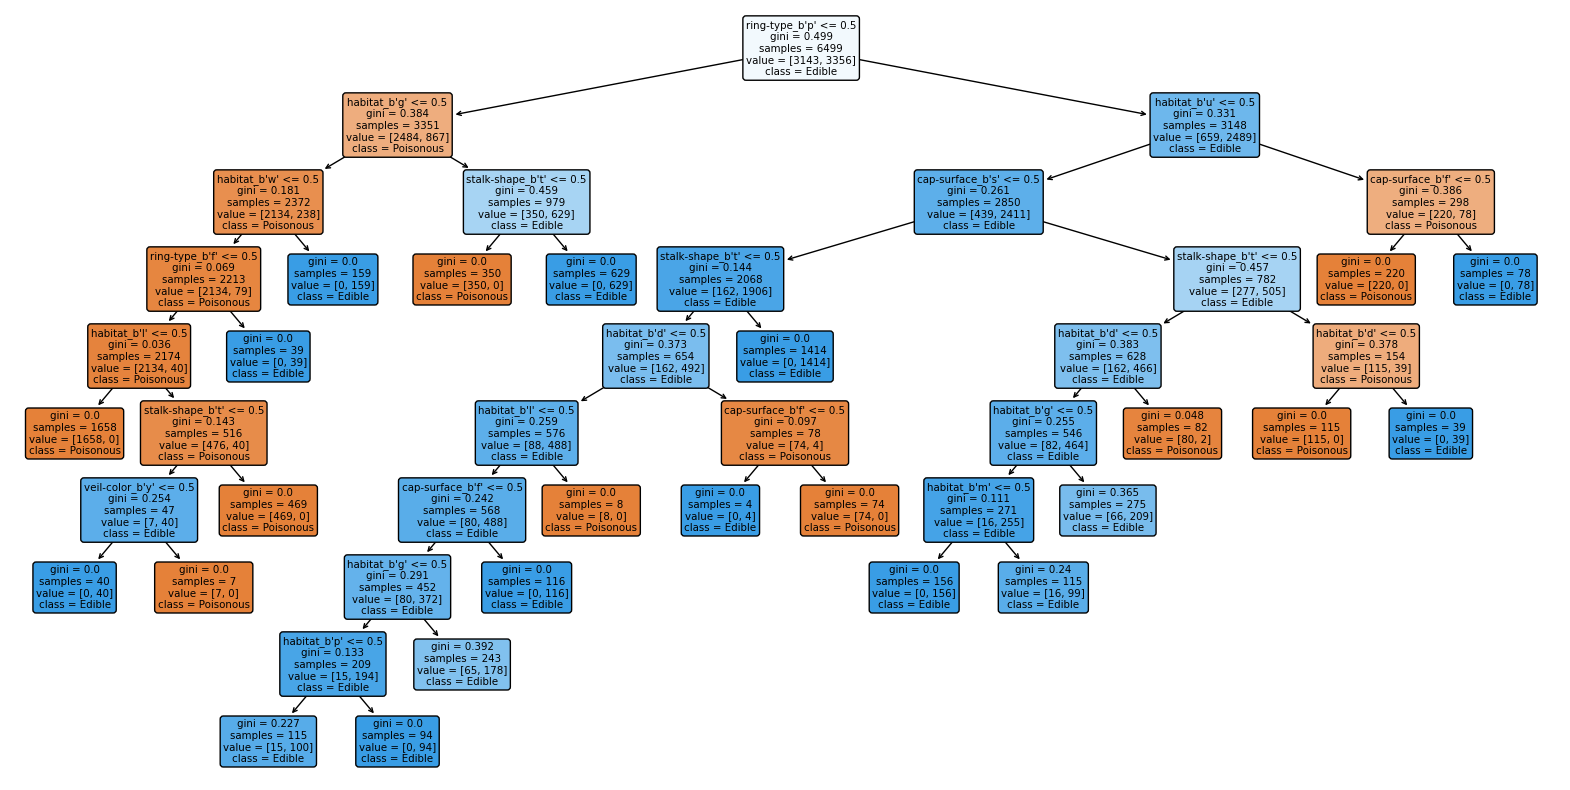

In [27]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=x.columns, class_names=["Poisonous", "Edible"], filled=True, rounded=True)
plt.show()